## Problem Statement 3
### Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network
    f. Plot the training loss and accuracy

### a. Import necessary packages

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

### b. Load training and testing data

In [ ]:
((X_train, Y_train),(X_test, Y_test)) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train=X_train.reshape((X_train.shape[0], -1))
X_test=X_test.reshape((X_test.shape[0], -1))
X_train=X_train/255.0
X_test=X_test/255.0
X_train.shape

(50000, 3072)

In [ ]:
lb=LabelBinarizer()

Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

### c. Define the network architecture using Keras

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

### d. Train the model using SGD/Adam optimizer

In [ ]:
epochs=10
model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5196 - accuracy: 0.4558 - val_loss: 1.5590 - val_accuracy: 0.4389
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5118 - accuracy: 0.4596 - val_loss: 1.5200 - val_accuracy: 0.4607
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5039 - accuracy: 0.4603 - val_loss: 1.5808 - val_accuracy: 0.4333
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4992 - accuracy: 0.4657 - val_loss: 1.5490 - val_accuracy: 0.4483
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4899 - accuracy: 0.4652 - val_loss: 1.5282 - val_accuracy: 0.4500
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4852 - accuracy: 0.4679 - val_loss: 1.5189 - val_accuracy: 0.4572
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4758 - accuracy: 0.4703 - val_loss: 1.5986 - val_accuracy:

### e. Evaluate the network

In [ ]:
predictions=model.predict(X_test)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))
# print(classification_report(Y_test, predictions.argmax(axis=1))

313/313 [==============================] - 0s 880us/step
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1000
           1       0.64      0.49      0.55      1000
           2       0.38      0.23      0.29      1000
           3       0.31      0.33      0.32      1000
           4       0.39      0.44      0.41      1000
           5       0.38      0.37      0.37      1000
           6       0.46      0.55      0.50      1000
           7       0.53      0.49      0.51      1000
           8       0.55      0.65      0.59      1000
           9       0.50      0.56      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



### f. Plot graphs

[]

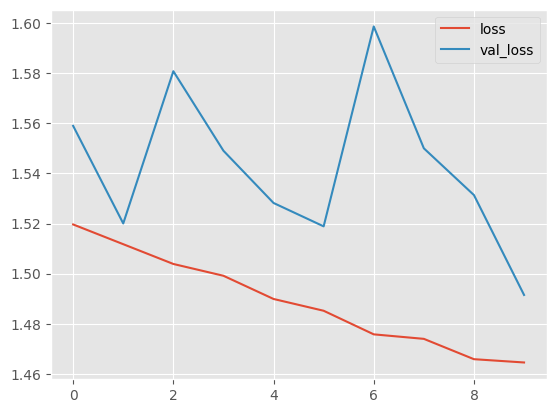

In [ ]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,epochs),H.history["loss"],label="loss")

plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")

plt.legend()
plt.plot()

[]

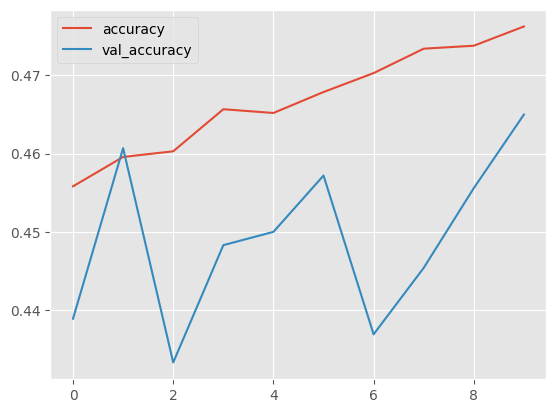

In [ ]:
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="accuracy")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.plot()